# 以相似度为训练目标

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 训练数据生成器

In [2]:
!git clone https://github.com/daibiaoxuwu/05wan11_11
!git clone https://github.com/daibiaoxuwu/05wan11b2
#!git clone https://github.com/daibiaoxuwu/05wan12
#!git clone https://github.com/daibiaoxuwu/05wan12b
!git clone https://github.com/daibiaoxuwu/05wan13
!git clone https://github.com/daibiaoxuwu/05wan13b3
!git clone https://github.com/daibiaoxuwu/05wan14
!git clone https://github.com/daibiaoxuwu/05wan14b2
!git clone https://github.com/daibiaoxuwu/3181
!git clone https://github.com/daibiaoxuwu/3181bb
!git clone https://github.com/daibiaoxuwu/3182
!git clone https://github.com/daibiaoxuwu/3182b
!git clone https://github.com/daibiaoxuwu/317
!git clone https://github.com/daibiaoxuwu/317b

Cloning into '05wan11_11'...
remote: Enumerating objects: 30512, done.
remote: Counting objects: 100% (30512/30512), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30512 (delta 30504), reused 30512 (delta 30504), pack-reused 0
Receiving objects: 100% (30512/30512), 9.61 MiB | 4.65 MiB/s, done.
Resolving deltas: 100% (30504/30504), done.
Cloning into '05wan11b2'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 183 (delta 0), reused 183 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 859.93 KiB | 748.00 KiB/s, done.
Cloning into '05wan13'...
remote: Enumerating objects: 40909, done.
remote: Counting objects: 100% (40909/40909), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40909 (delta 40900), reused 40909 (delta 40900), pack-reused 0
Receiving objects: 100% (40909/40909), 8.82 MiB | 4.68 MiB/s, done.
Resolving deltas: 100% (40900

In [0]:
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

datasizex = 9
datasizey = 9

picnum = 30
lowpercent = 125.0
highpercent = 233.0
enhance = 4
def read_data(path1,path2,sx,sy):

  x_train0 = []
  y_train0 = dict()
  idxes = dict()

  #read clock
  #read and /255
  for filename in os.listdir(path2):
      if 'git' in filename: continue
      ans = cv2.imread(os.path.join(path2,filename),cv2.IMREAD_GRAYSCALE).astype('float32')     
      ans = np.clip((ans-lowpercent)/(highpercent - lowpercent),0,1)
      y_train0[int(filename[:-4])]=ans

  keys = list(y_train0.keys())
  
  #read data
  #add an axis and /255
  
  filelist = os.listdir(path1)
  random.shuffle(filelist)
  index = 0
  for filename in filelist:
      if 'git' in filename or 'c.jpg' in filename: continue
      ftime = int(filename.split('_')[0])
      value = max(filter(lambda t:t<ftime,keys))
      if(abs(ftime-value)<10000):continue

      x_train0.append(cv2.imread(os.path.join(path1,filename)).astype('float32')/255.0)
      if value not in idxes:idxes[value]=[index]
      else: idxes[value].append(index)
      index += 1

  #index data
  print(len(x_train0),index,len(y_train0),len(idxes.keys()))
  lens = [len(i) for i in idxes.values()]
  print(min(lens),max(lens),np.average(lens))
  for key,val in list(idxes.items()):
    if len(val)<picnum:
      idxes.pop(key)
  

  #generator
  def data_generator(ikeys_t):
    while True:
      
      dataout = []

      '''
      while True:
        key = random.choice(ikeys_t)
        idx2 = random.sample(idxes[key],picnum)
        posx = random.randint(0,picsizex-datasizex)
        posy = random.randint(0,picsizey-datasizey)
        pic = x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:]
        if(np.sum(pic) < 175):
          for i in range(picnum):
            dataout[i].append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
          ansout.append(y_train0[key][posx:posx+datasizex,posy:posy+datasizey])
          break
      '''
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      posx = random.randint(0,x_train0[0].shape[0]-datasizex)
      posy = random.randint(0,x_train0[0].shape[1]-datasizey)
    
      for i in range(picnum):
        dataout.append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
      ansout = y_train0[key][posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance]
      yield dataout,ansout
      
  def pic_generator(ikeys_t):
    while True:
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      data=[x_train0[i] for i in idx2]
      ans=y_train0[key]
      yield data,ans

  #split
  ikeys = list(idxes.keys())
  random.shuffle(ikeys)
  ltrain = int(len(ikeys)*0.8)  
  train_generator = data_generator(ikeys[:ltrain])
  test_generator = data_generator(ikeys[ltrain:])
  train_pic_generator = pic_generator(ikeys[:ltrain])
  test_pic_generator = pic_generator(ikeys[ltrain:])

  return train_generator,test_generator,train_pic_generator,test_pic_generator



In [24]:

from matplotlib import pyplot as plt
picsizex = 18
picsizey = 38
train_generators = [0,0,0,0,0,0]
test_generators = [0,0,0,0,0,0]
train_pic_generators = [0,0,0,0,0,0]
test_pic_generators = [0,0,0,0,0,0]
train_generators[0],test_generators[0],train_pic_generators[0],test_pic_generators[0] = read_data('05wan11_11','05wan11b2',18,38)
train_generators[1],test_generators[1],train_pic_generators[1],test_pic_generators[1] = read_data('05wan13','05wan13b3',14,31)
train_generators[2],test_generators[2],train_pic_generators[2],test_pic_generators[2] = read_data('05wan14','05wan14b2',14,31)
train_generators[3],test_generators[3],train_pic_generators[3],test_pic_generators[3] = read_data('3182','3182b',10,47)
train_generators[4],test_generators[4],train_pic_generators[4],test_pic_generators[4] = read_data('3181','3181bb',10,47)
train_generators[5],test_generators[5],train_pic_generators[5],test_pic_generators[5] = read_data('317','317b',11,22)

def stack_generator(generators):
  while True:
    dataout = []
    for i in range(picnum):dataout.append([])
    ansout = []
    for train2 in range(32):
      data,ans=next(generators[random.randint(0,5)])
      for i in range(picnum):
        dataout[i].append(data[i])
      ansout.append(ans)
    yield [np.stack(data2) for data2 in dataout],np.stack(ansout)

train_generator = stack_generator(train_generators)
test_generator = stack_generator(test_generators)


27456 27456 181 138
79 207 198.95652173913044
36839 36839 608 190
87 202 193.88947368421051
63590 63590 343 335
27 204 189.82089552238807
48818 48818 344 305
97 186 160.05901639344262
58666 58666 355 351
100 189 167.13960113960113
48374 48374 435 278
14 188 174.0071942446043


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


999.1759
0.0 1.0


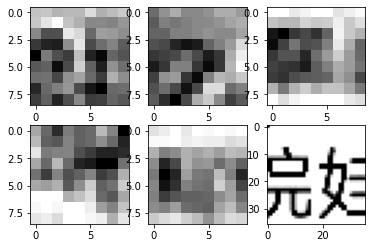

In [5]:
data,ans = next(test_generator)
for pics in data:
  for i in range(6):
    plt.subplot(231+i)
    plt.imshow(pics[i,:,:,0],cmap='gray')
ans[0,0,0]=0
ans[0,1,0]=1
plt.imshow(ans[0],cmap='gray')
print(np.sum(ans[0]))
print(np.min(ans[0]),np.max(ans[0]))

# 数据初始化完成。


# 装载Tensorflow

In [6]:

from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

TensorFlow 2.x selected.



# 搭建模型和训练
现在的网络去掉dropout则可以拟合10张图片，
但是加上dropout就拟合不了。
从7张拟合5张的，则可以在两个epoch（每个epoch抽取60000次）内到80%。

继续训练20张，一个epoch就到60%。

In [0]:
inputs = [tf.keras.layers.Input(shape=(datasizex,datasizey,3))  for i in range(picnum)]
#inputs = tf.keras.layers.Input(shape=(5,12,12,1))
convg1 = 0
convd1 = 0
convh1 = inputs
inputs_big = inputs
for layernum in range(8):
  conv_a1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  conva1 = [conv_a1(convh1[i]) for i in range(picnum)]
  #drop_a1 = tf.keras.layers.Dropout(0.2)
  #conva1 = drop_a1(conva1)
  conv_b1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convb1 = [conv_b1(conva1[i]) for i in range(picnum)]
  

  conv_c1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convc1 = [conv_c1(inputs_big[i]) for i in range(picnum)]
  #drop_b1 = tf.keras.layers.Dropout(0.2)
  #convc1 = drop_a1(convc1)
  conv_d1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convd1 = [conv_d1(convc1[i]) for i in range(picnum)]
  

  convs1 = tf.stack(convb1)
  convf1 = [
      tf.math.reduce_max(convs1, axis=[0]),
      tf.math.reduce_mean(convs1, axis=[0]),
      tf.math.reduce_min(convs1, axis=[0]),
  ]

  conv_g1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convg1 = [conv_g1(convf1[i]) for i in range(3)]

  drop_c1 = tf.keras.layers.Dropout(0.2)
  convh1 = [drop_c1(tf.concat(convg1+[convd1[i]],axis=3)) for i in range(picnum)]
  if(layernum % 3 == 1):
    convex1 = tf.keras.layers.Conv2D(32, (1, 1), padding = 'Same',  activation='relu')
    convh1 = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in convh1]
    convh1 = [convex1(convh1[i]) for i in range(picnum)]
    inputs_big = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in inputs_big]
convh3 = tf.concat(convg1+convd1,axis=3)

convx1 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same',  activation='relu')(convh3)
convx2 = tf.keras.layers.Dropout(0.2)(convx1)
convx3 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu')(convx2)
'''
convx3 = tf.keras.layers.Flatten()(convx2)

#keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
convx4 = tf.keras.layers.Dropout(0.2)(convx3)

convy1 = tf.keras.layers.Dense(21*45)(convx4)
#convy3 = tf.keras.layers.Dense(10,activation='softmax')(convy1)
convy4 = tf.keras.layers.Reshape([21,45])(convy1)
'''

convx4 = tf.keras.layers.Conv2D(1, (3, 3), padding = 'Same')(convx3)

model = tf.keras.Model(inputs=inputs, outputs=convx4)


In [0]:
#tf.reduce_mean(tf.image.ssim(reconstructed, truth, 1.0))
model.compile(optimizer='adam',#tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                #loss=lambda y_pred,y_true:1-tf.reduce_mean(tf.image.ssim_multiscale(tf.clip_by_value(y_pred,0,1), y_true, 255))#-tf.reduce_mean(tf.image.psnr(tf.clip_by_value(y_pred,0,1), y_true, 1.0))
              loss='mse',
              metrics=['mse']
              )
            
#model.summary()

# 测试正确率：

In [0]:
from skimage.metrics import peak_signal_noise_ratio,structural_similarity, mean_squared_error
class show_accuracy(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch % 5 == 1:
      data,ans = next(test_generator)
      data = [data[x][5][np.newaxis,:,:,:] for x in range(picnum)]
      ans = ans[5]
      import matplotlib
      cmap = matplotlib.cm.gray 
      cmap.set_bad(color='black')

      pred = model.predict(data) #shape:(1,11,11,1) because last layer is conv not dense
      #pred = np.clip(pred,0,1)
      #pred = (pred-np.min(pred))/(np.max(pred)-np.min(pred))
      #pred = softmax(pred)
      pred[0,0,0,0]=0
      pred[0,-1,-1,0]=1
      ans[0,0]=0
      ans[-1,-1]=1
      for i in range(6):
        plt.subplot(231+i)
        plt.imshow(data[i][0,:,:,0],cmap=cmap)
      plt.show()
      plt.subplot(121)
      plt.imshow(pred[0,:,:,0],cmap=cmap)
      plt.colorbar()
      #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
      plt.subplot(122)
      plt.imshow(ans,cmap=cmap)
      plt.colorbar()
      plt.show()
#      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
#      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
     # print('mse',mean_squared_error(np.clip(pred[0,:,:,0],0,1),ans))



# 开始训练

In [0]:
#!cp -r "/content/drive/My Drive/checkpoints/training_15/" "/content/drive/My Drive/checkpoints/training_15_archive2"

In [0]:
# Suppress some level of logs
import logging
logging.getLogger("tensorflow").setLevel(logging.WARN)

In [0]:
#!ls "/content/drive/My Drive/checkpoints"
model.load_weights(tf.train.latest_checkpoint("/content/drive/My Drive/checkpoints/training_24/"))#,by_name=True)

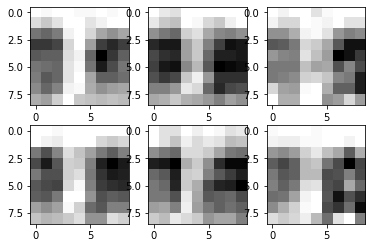

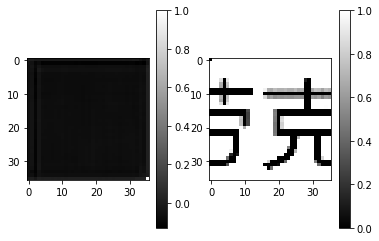

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 50 steps
Epoch 1/200
500/500 - 541s - loss: 0.1639 - mse: 0.1639 - val_loss: 0.1541 - val_mse: 0.1541
Epoch 2/200


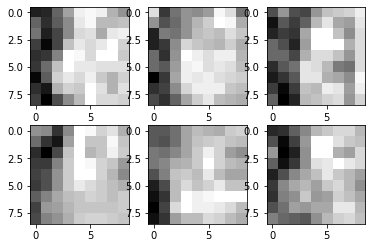

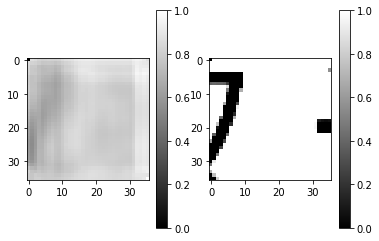

500/500 - 503s - loss: 0.1544 - mse: 0.1544 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 3/200
500/500 - 502s - loss: 0.1517 - mse: 0.1517 - val_loss: 0.1485 - val_mse: 0.1485
Epoch 4/200
500/500 - 501s - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 5/200
500/500 - 501s - loss: 0.1479 - mse: 0.1479 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 6/200
500/500 - 499s - loss: 0.1468 - mse: 0.1468 - val_loss: 0.1447 - val_mse: 0.1447
Epoch 7/200


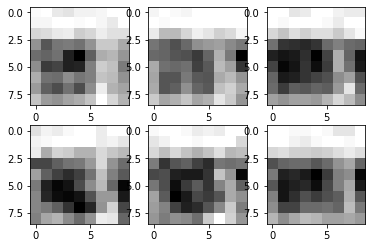

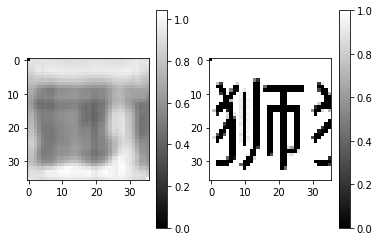

500/500 - 499s - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 8/200
500/500 - 497s - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 9/200
500/500 - 495s - loss: 0.1423 - mse: 0.1423 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 10/200
500/500 - 495s - loss: 0.1423 - mse: 0.1423 - val_loss: 0.1375 - val_mse: 0.1375
Epoch 11/200
500/500 - 491s - loss: 0.1398 - mse: 0.1398 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 12/200


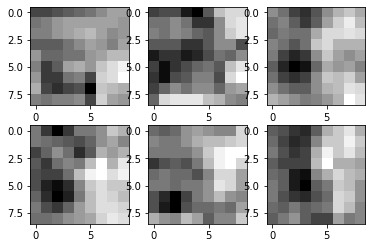

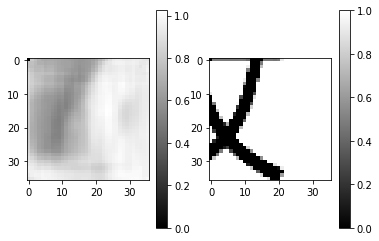

500/500 - 496s - loss: 0.1396 - mse: 0.1396 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 13/200
500/500 - 494s - loss: 0.1393 - mse: 0.1393 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 14/200
500/500 - 492s - loss: 0.1387 - mse: 0.1387 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 15/200
500/500 - 492s - loss: 0.1384 - mse: 0.1384 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 16/200
500/500 - 493s - loss: 0.1365 - mse: 0.1365 - val_loss: 0.1367 - val_mse: 0.1367
Epoch 17/200


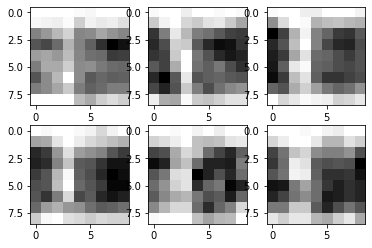

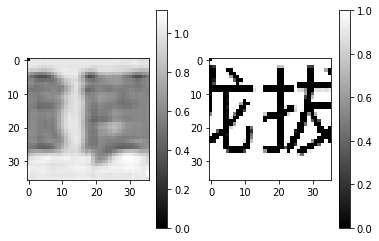

500/500 - 492s - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 18/200
500/500 - 488s - loss: 0.1359 - mse: 0.1359 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 19/200
500/500 - 488s - loss: 0.1377 - mse: 0.1377 - val_loss: 0.1348 - val_mse: 0.1348
Epoch 20/200
500/500 - 488s - loss: 0.1350 - mse: 0.1350 - val_loss: 0.1362 - val_mse: 0.1362
Epoch 21/200
500/500 - 488s - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 22/200


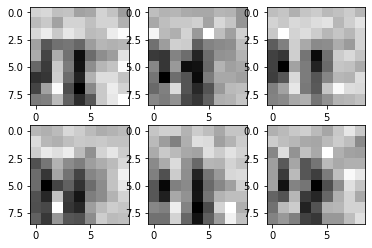

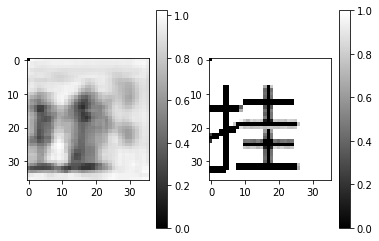

500/500 - 488s - loss: 0.1345 - mse: 0.1345 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 23/200
500/500 - 487s - loss: 0.1345 - mse: 0.1345 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 24/200
500/500 - 488s - loss: 0.1347 - mse: 0.1347 - val_loss: 0.1343 - val_mse: 0.1343
Epoch 25/200
500/500 - 489s - loss: 0.1344 - mse: 0.1344 - val_loss: 0.1334 - val_mse: 0.1334
Epoch 26/200
500/500 - 488s - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 27/200


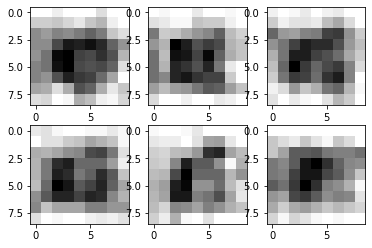

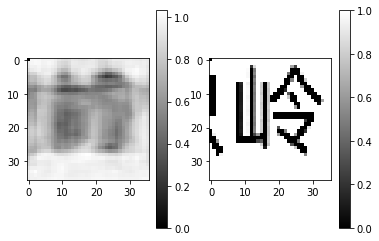

500/500 - 490s - loss: 0.1331 - mse: 0.1331 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 28/200
500/500 - 488s - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 29/200
500/500 - 488s - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 30/200
500/500 - 486s - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1370 - val_mse: 0.1370
Epoch 31/200
500/500 - 486s - loss: 0.1335 - mse: 0.1335 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 32/200


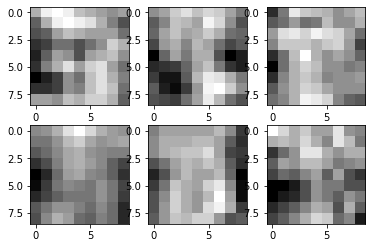

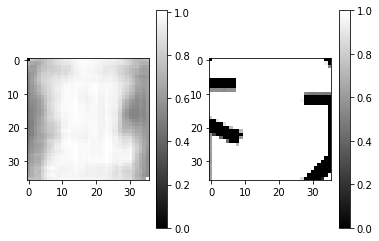

500/500 - 486s - loss: 0.1324 - mse: 0.1324 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 33/200
500/500 - 486s - loss: 0.1324 - mse: 0.1324 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 34/200
500/500 - 486s - loss: 0.1327 - mse: 0.1327 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 35/200
500/500 - 486s - loss: 0.1319 - mse: 0.1319 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 36/200
500/500 - 486s - loss: 0.1327 - mse: 0.1327 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 37/200


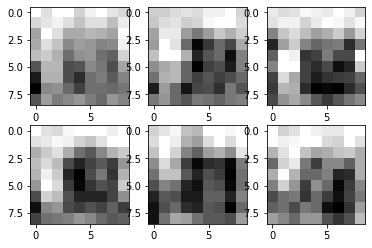

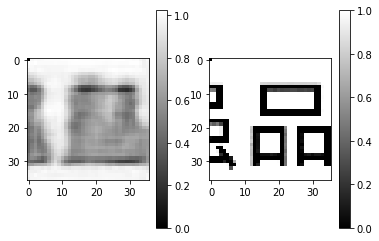

500/500 - 487s - loss: 0.1316 - mse: 0.1316 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 38/200
500/500 - 486s - loss: 0.1311 - mse: 0.1311 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 39/200
500/500 - 486s - loss: 0.1314 - mse: 0.1314 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 40/200
500/500 - 485s - loss: 0.1318 - mse: 0.1318 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 41/200
500/500 - 486s - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 42/200


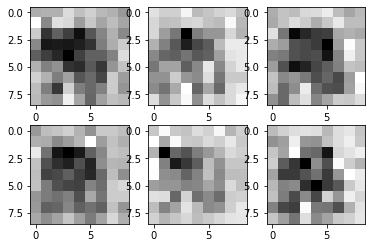

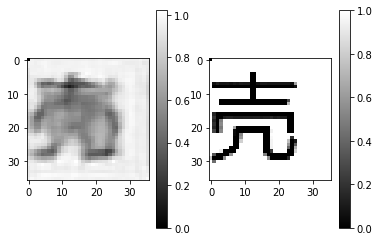

500/500 - 487s - loss: 0.1317 - mse: 0.1317 - val_loss: 0.1343 - val_mse: 0.1343
Epoch 43/200
500/500 - 486s - loss: 0.1304 - mse: 0.1304 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 44/200
500/500 - 486s - loss: 0.1309 - mse: 0.1309 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 45/200
500/500 - 485s - loss: 0.1309 - mse: 0.1309 - val_loss: 0.1276 - val_mse: 0.1276
Epoch 46/200
500/500 - 486s - loss: 0.1303 - mse: 0.1303 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 47/200


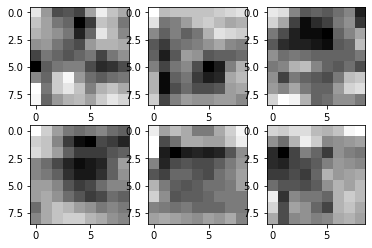

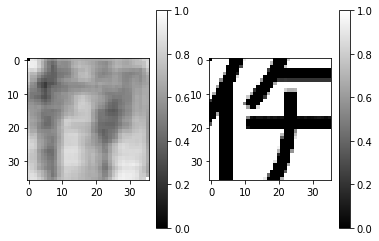

500/500 - 486s - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1301 - val_mse: 0.1301
Epoch 48/200
500/500 - 486s - loss: 0.1315 - mse: 0.1315 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 49/200
500/500 - 486s - loss: 0.1305 - mse: 0.1305 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 50/200
500/500 - 486s - loss: 0.1302 - mse: 0.1302 - val_loss: 0.1310 - val_mse: 0.1310
Epoch 51/200
500/500 - 486s - loss: 0.1310 - mse: 0.1310 - val_loss: 0.1296 - val_mse: 0.1296
Epoch 52/200


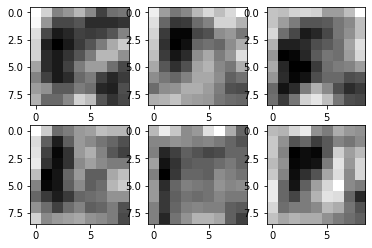

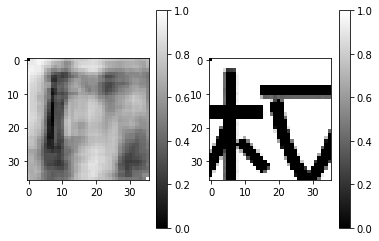

500/500 - 487s - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1326 - val_mse: 0.1326
Epoch 53/200
500/500 - 486s - loss: 0.1303 - mse: 0.1303 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 54/200
500/500 - 486s - loss: 0.1307 - mse: 0.1307 - val_loss: 0.1294 - val_mse: 0.1294
Epoch 55/200
500/500 - 486s - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 56/200
500/500 - 486s - loss: 0.1303 - mse: 0.1303 - val_loss: 0.1293 - val_mse: 0.1293
Epoch 57/200


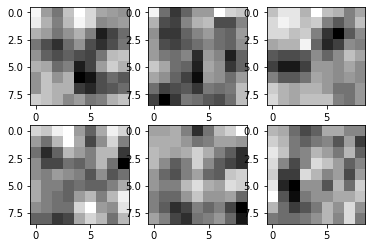

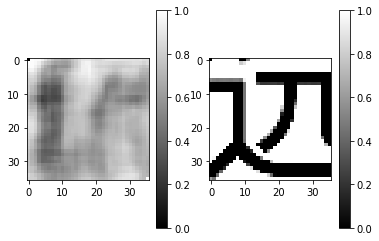

500/500 - 488s - loss: 0.1297 - mse: 0.1297 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 58/200
500/500 - 486s - loss: 0.1296 - mse: 0.1296 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 59/200
500/500 - 486s - loss: 0.1294 - mse: 0.1294 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 60/200
500/500 - 486s - loss: 0.1290 - mse: 0.1290 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 61/200
500/500 - 486s - loss: 0.1293 - mse: 0.1293 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 62/200


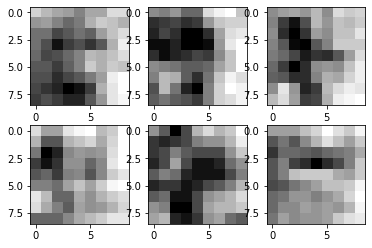

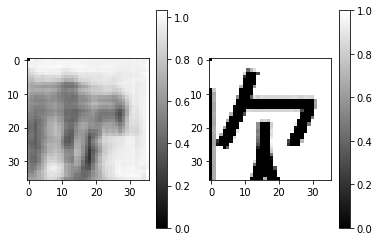

500/500 - 487s - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1284 - val_mse: 0.1284
Epoch 63/200
500/500 - 486s - loss: 0.1283 - mse: 0.1283 - val_loss: 0.1301 - val_mse: 0.1301
Epoch 64/200
500/500 - 486s - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 65/200
500/500 - 486s - loss: 0.1298 - mse: 0.1298 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 66/200
500/500 - 486s - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 67/200


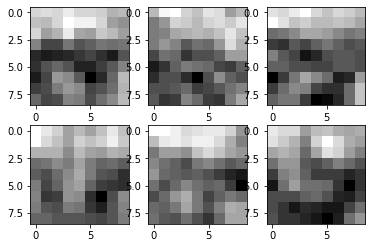

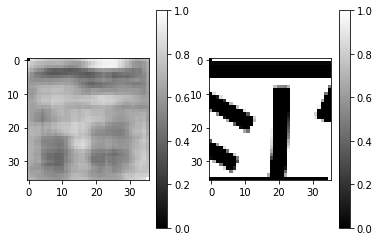

500/500 - 487s - loss: 0.1286 - mse: 0.1286 - val_loss: 0.1283 - val_mse: 0.1283
Epoch 68/200
500/500 - 486s - loss: 0.1281 - mse: 0.1281 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 69/200
500/500 - 486s - loss: 0.1292 - mse: 0.1292 - val_loss: 0.1289 - val_mse: 0.1289
Epoch 70/200


In [0]:
#checkpoint_path = "training_16/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_path = "/content/drive/My Drive/checkpoints/training_25/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_dir):
  model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))#,by_name=True)
  print("=======================================load weights!=======================================")
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,monitor='val_loss')#,save_best_only=True,mode='min')
show_accuracy_callback = show_accuracy()
show_accuracy_callback.on_epoch_end(epoch=1)
model.fit_generator(train_generator,epochs=200,steps_per_epoch=500,validation_data=test_generator,validation_steps=50,validation_freq=1,verbose=2,callbacks=[cp_callback,show_accuracy_callback])


# 验证模型

In [0]:
def predict_pic(xpics,model):
  # xpic: array of 5 with size(22,52,1)
  picout = np.zeros((picsizex*enhance,picsizey*enhance),dtype=np.float32)
  piclayer = np.zeros((picsizex*enhance,picsizey*enhance),dtype=int)
  for posx in range(0,picsizex+1-datasizex):
    for posy in range(0,picsizey+1-datasizey):
      dataout = [pic[np.newaxis,posx:posx+datasizex,posy:posy+datasizey,:] for pic in xpics]
      pred = model.predict(dataout)
      picout[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += pred[0,:,:,0]
      piclayer[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += np.ones((datasizex*enhance,datasizey*enhance),dtype=int)
  picout /= piclayer
  return picout


In [0]:
import matplotlib
cmap = matplotlib.cm.gray 
cmap.set_bad(color='black')
for ti in range(10):    
  data,ans = next(test_pic_generators[0])



  pred = predict_pic(data,model)

  for i in range(6):
    plt.subplot(231+i)
    b,g,r = cv2.split(data[i])       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)

  plt.show()      
  pred[0,0]=0
  pred[-1,-1]=1
  ans[0,0]=0
  ans[-1,-1]=1
  plt.subplot(121)
  plt.imshow(pred,cmap=cmap)
  plt.colorbar()
  #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
  plt.subplot(122)
  plt.imshow(ans,cmap=cmap)
  plt.colorbar()
  plt.show()
  #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
  #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
  print('mse',mean_squared_error(np.clip(pred,0,1),ans))
